In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#Load Yolo
weights='../input/yolo-coco-data/yolov3.weights'
cfg='../input/yolo-coco-data/yolov3.cfg'
classes_names='../input/yolo-coco-data/coco.names'


In [3]:
network = cv2.dnn.readNetFromDarknet(cfg, weights)
layers_names_all = network.getLayerNames()
layers_names_output = [layers_names_all[i-1] for i in network.getUnconnectedOutLayers()]#get yolo layers

In [4]:
labels = [] #get labels names
with open(classes_names, "r") as f:
    labels = [line.strip() for line in f.readlines()]

In [5]:
def ImagePath(path):
    
    bounding_boxes = [] #bounding box (x,y,w,h)
    confidences = [] #confidences that it belong to this class in label
    class_numbers = [] #index for label 
    
    probability_minimum = 0.5
    threshold = 0.3
    
    image_input = cv2.imread(path)
    blob = cv2.dnn.blobFromImage(image_input, 1/255.0, (416,416), swapRB=True, crop=False)
    
    network.setInput(blob)
    output_from_network = network.forward(layers_names_output)
    h,w = image_input.shape[:2] 

    for result in output_from_network:
        for detection in result:
            scores = detection[5:]
            class_current = np.argmax(scores) #find the index of label that has the most confidence score
            confidence_current = scores[class_current] #get the score (index = class_current)
            if confidence_current > probability_minimum:
                box_current = detection[0:4] * np.array([w, h, w, h])
                x_center, y_center, box_width, box_height = box_current.astype('int')
                x_min = int(x_center-(box_width/2))
                y_min = int(y_center-(box_height/2))
                bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
                confidences.append(float(confidence_current))
                class_numbers.append(class_current)
    labels2=[]
    for item in sorted(set(class_numbers)):
        labels2+=[labels[item]]
        
    indexes = cv2.dnn.NMSBoxes(bounding_boxes, confidences, 0.5, 0.2)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(bounding_boxes)):
        if i in indexes:
            x, y, w, h = bounding_boxes[i]
            label = str(labels[class_numbers[i]])
            colors = np.random.uniform(0, 255, size=(len(classes_names), 3))
            color = colors[i]
            confi=str(round(confidences[i],2))
            cv2.rectangle(image_input, (x,y), (x + w, y + h), color, 2)
            cv2.putText(image_input, label+''+confi, (x, y + 30), font, 2, color,2)   
   
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (10,10)
    plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
    plt.show()
    
    
        
    return labels2

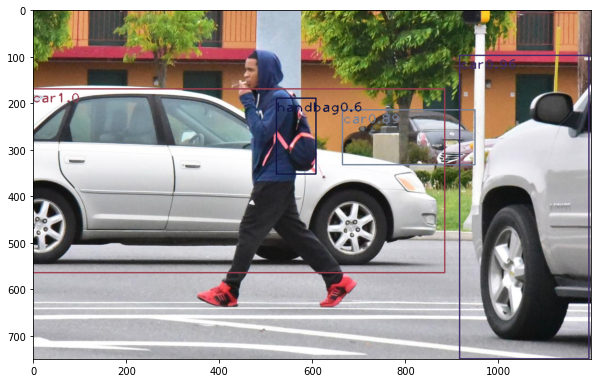

['person', 'car', 'handbag']

In [6]:
ImagePath("../input/photos-todetect/5ccc7cc267ae3.image.jpg")


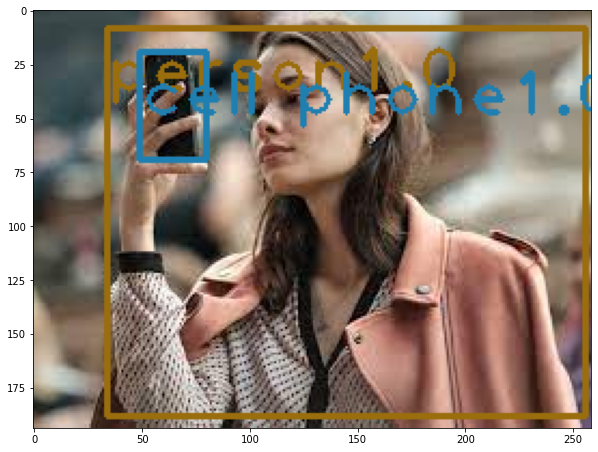

['person', 'cell phone']

In [7]:
ImagePath('../input/photos-todetect/download (1).jpg')

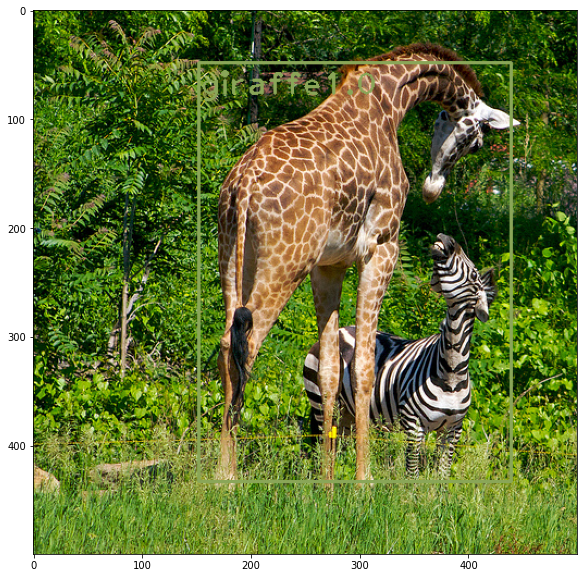

['zebra', 'giraffe']

In [8]:
ImagePath('../input/photos-todetect/giraffe.jpg')

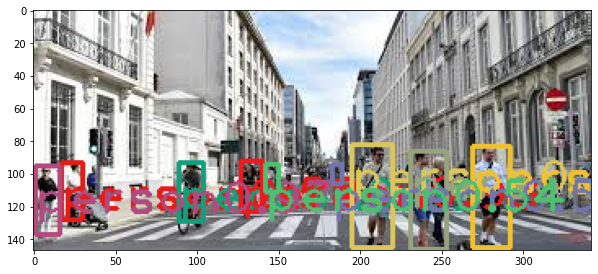

['person', 'bicycle']

In [9]:
ImagePath('../input/photos-todetect/c.jpg')